<a href="https://colab.research.google.com/github/Kanchan20-Mandal/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regression with Keras

##Switch from CPU to GPU. Always work on GPU runtime

## Data Ingestion

In [1]:
path = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/PowerPlant.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Perform the basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
df.shape

(9568, 5)

In [4]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

## check for missing data/duplicated rows

In [5]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [6]:
df.duplicated().sum()

np.int64(41)

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y features

In [9]:
X=df.drop(columns=["PE"])
Y=df[["PE"]]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Data cleaning

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [13]:
num_pipe=make_pipeline(SimpleImputer(strategy="mean"),StandardScaler()).set_output(transform="pandas")

In [14]:
X_pre=num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Perform train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,train_size=0.75,random_state=42)

In [16]:
xtrain.head()

,AT,V,AP,RH
1845,-0.886381,-0.795657,0.961736,0.845161
8505,0.939249,0.960659,-1.268824,-0.564462
8152,-0.957579,-0.966717,0.729421,0.563784
5023,0.143978,0.439598,0.983620,0.489161
1744,-1.214161,-0.967505,-2.257003,1.596868


In [17]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [18]:
ytrain.head()

,PE
1845,469.02
8505,436.65
8152,469.18
5023,445.18
1744,472.41


In [19]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


## Model building with Keras

In [20]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [21]:
xtrain.shape

(7145, 4)

In [22]:
# Column shape/features shape
xtrain.shape[1]

4

In [23]:
# Intialize the model
model=Sequential()

# Add the Input layer by providing features as Input
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Dense layer - hidden layer 1
model.add(Dense(units=8,activation="relu"))

# Add another hidden layer 2
model.add(Dense(units=4,activation="relu"))

# Add the output layer
model.add(Dense(units=1,activation="linear"))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

### Deep Learning
  train test split
  train model, further splitting will happens
  train data is further divided into training and validation

Model will be compared with trianing scores and validated scores

## Epoch: one complete pass of forward propagation and backpropagation

In [27]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 206256.2031 - mae: 453.8378 - val_loss: 202980.4844 - val_mae: 450.1963
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 201878.5312 - mae: 448.9706 - val_loss: 192113.7812 - val_mae: 437.8962
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 187708.9375 - mae: 432.7711 - val_loss: 166409.6406 - val_mae: 407.1758
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 158593.5000 - mae: 397.1310 - val_loss: 122768.8203 - val_mae: 347.9062
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 112753.2734 - mae: 332.0746 - val_loss: 74754.6953 - val_mae: 264.6598
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66902.5781 - mae: 247.1698 - val_loss: 40191.2656 - val_mae: 180.2457
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 36069.6523 - mae: 168.2118 - val_loss: 24507.1133 - val_mae: 133.6045
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22734.3574 -

## Evaluate the model

In [28]:
model.evaluate(xtrain,ytrain)

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19.9513 - mae: 3.5330


[20.34507942199707, 3.5371038913726807]

In [29]:
model.evaluate(xtest,ytest)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.4293 - mae: 3.5129


[20.453397750854492, 3.5587663650512695]

## Learning Curve

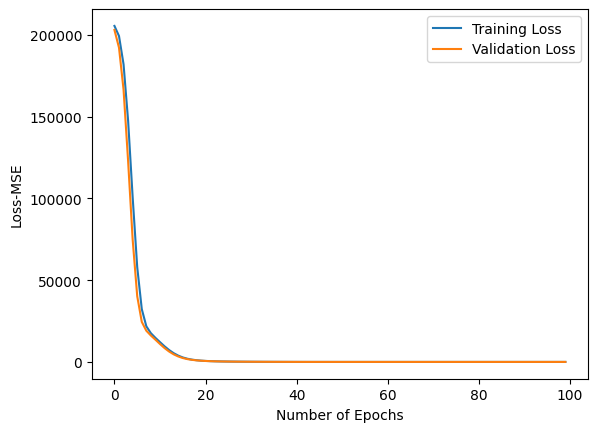

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss-MSE")
plt.legend()
plt.show()

## Evaluate the model using testing data

In [31]:
ypred_test=model.predict(xtest)
ypred_test

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[425.78958],
       [480.33414],
       [481.55295],
       ...,
       [453.0787 ],
       [476.41867],
       [456.36557]], dtype=float32)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [33]:

def evaluate_model(model,xdata,ydata):
  ypred=model.predict(xdata)

  MSE = mean_squared_error(ydata,ypred)
  MAE = mean_absolute_error(ydata,ypred)
  R2 = r2_score(ydata,ypred)

  print(f"MSE: {MSE}")
  print(f"MAE:{MAE}")
  print(f"R2-score: {R2}")


In [34]:
evaluate_model(model,xtrain,ytrain)

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE: 20.34507179260254
MAE:3.5371041297912598
R2-score: 0.9292581677436829


In [35]:
evaluate_model(model,xtest,ytest)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE: 20.453399658203125
MAE:3.558767557144165
R2-score: 0.9314256906509399


## Save the model

In [36]:
model.save("PowerplantPredictions.keras")

## Above model provides ~93% r2 score in test data. Let's consider this model for final predictions

## Load the keras models

In [37]:
from keras.models import load_model

In [38]:
m=load_model("/content/PowerplantPredictions.keras")

In [39]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [40]:
path2 = "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/PowerPlantTest.csv"
xnew = pd.read_csv(path2)
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [41]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [43]:
PE_preds = m.predict(xnew_pre)
PE_preds = PE_preds.round(2)
PE_preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


array([[445.65],
       [438.6 ],
       [437.42]], dtype=float32)

## Save the data to dataframe and then save the results to csv file

In [44]:
xnew["PE Predicted"] = PE_preds

In [45]:
xnew.columns

Index(['AT', 'V', 'AP', 'RH', 'PE Predicted'], dtype='object')

In [46]:
xnew["PE Predicted"] = xnew["PE Predicted"].round(2)
xnew

,AT,V,AP,RH,PE Predicted
0,25,51.5,1000.1,57.0,445.649994
1,32,41.0,1051.1,80.0,438.600006
2,28,NaN,1010.2,NaN,437.420013
